**About Dataset**

**Context**

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

**Content**

1.Title: Auto-Mpg Data


2.Sources:

(a) Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. The dataset was
used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993

3.Past Usage:

See 2b (above)
Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.

4.Relevant Information:

This dataset is a slightly modified version of the dataset provided in
the StatLib library. In line with the use by Ross Quinlan (1993) in
predicting the attribute "mpg", 8 of the original instances were removed
because they had unknown values for the "mpg" attribute. The original
dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)

5.Number of Instances: 398

6.Number of Attributes: 9 including the class attribute

7.Attribute Information:

mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)

8.Missing Attribute Values: horsepower has 6 missing values

**Acknowledgements**

Dataset: UCI Machine Learning Repository

Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

**Inspiration**

I have used this dataset for practicing my exploratory analysis skills.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle

In [3]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df.shape

(398, 9)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [10]:
#Cleaning Missing Data

df['horsepower']

,horsepower
0,130
1,165
2,150
3,150
4,140
...,...
393,86
394,52
395,84
396,79


In [14]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
df['horsepower'] = df['horsepower'].replace('?',np.nan).astype(float)

In [16]:
df = df.dropna(subset=['horsepower'])

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [18]:
if 'car name' in df.columns:
  df = df.drop(columns=['car name'])

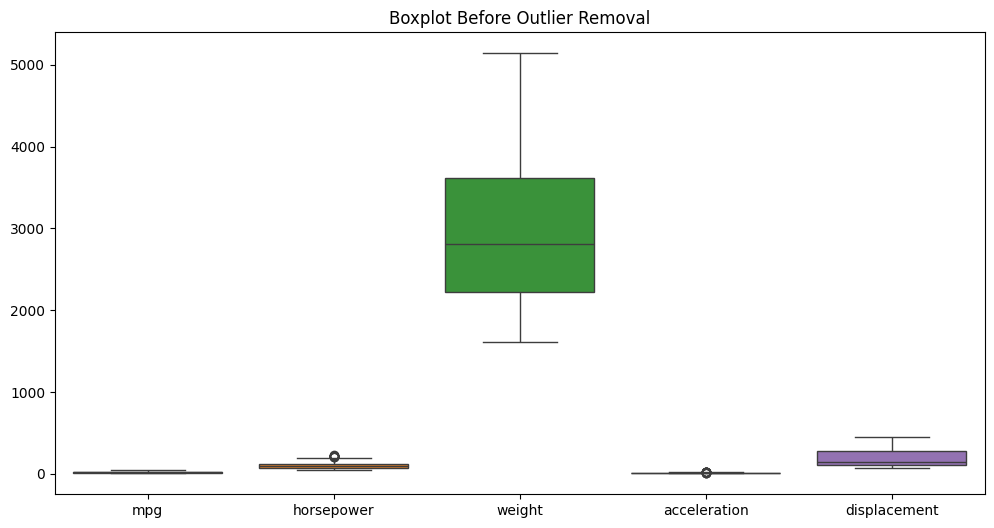

In [21]:
# Checking Outliers
num_df = df[['mpg','horsepower','weight','acceleration','displacement']]

plt.figure(figsize=(12, 6))
sns.boxplot(data=num_df)
plt.title("Boxplot Before Outlier Removal")
plt.show()

In [23]:
#Removing the outlier

outlier_cols = ['mpg','weight','displacement','horsepower']

for col in outlier_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers Removed Scuccessfully")

Outliers Removed Scuccessfully


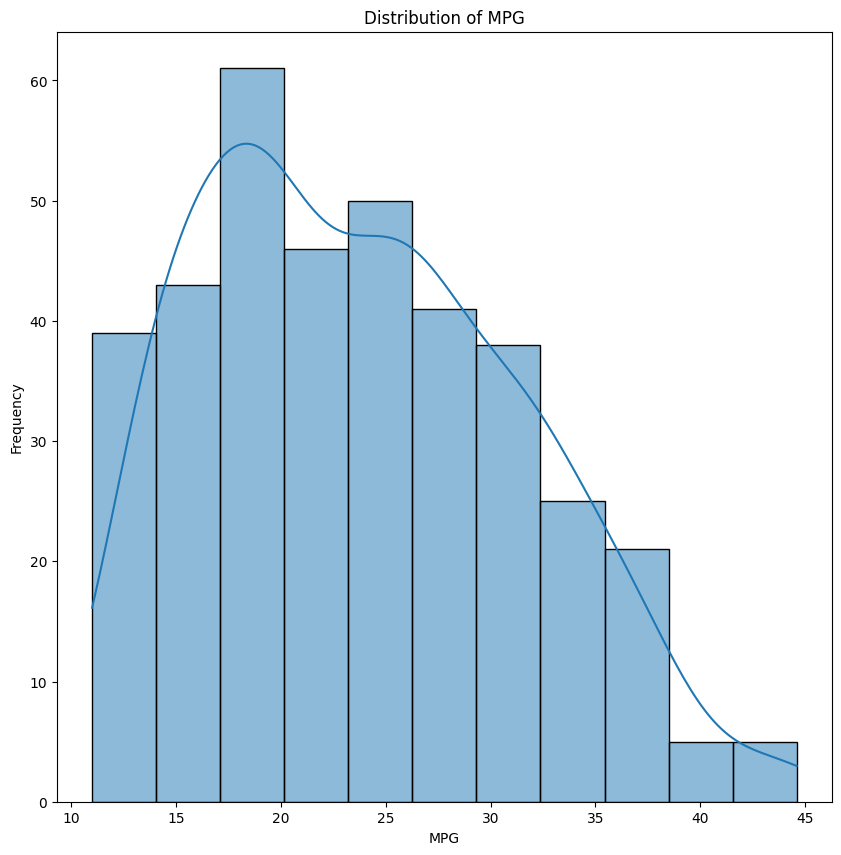

In [26]:
#EDA

plt.figure(figsize=(10,10))
sns.histplot(df['mpg'],kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

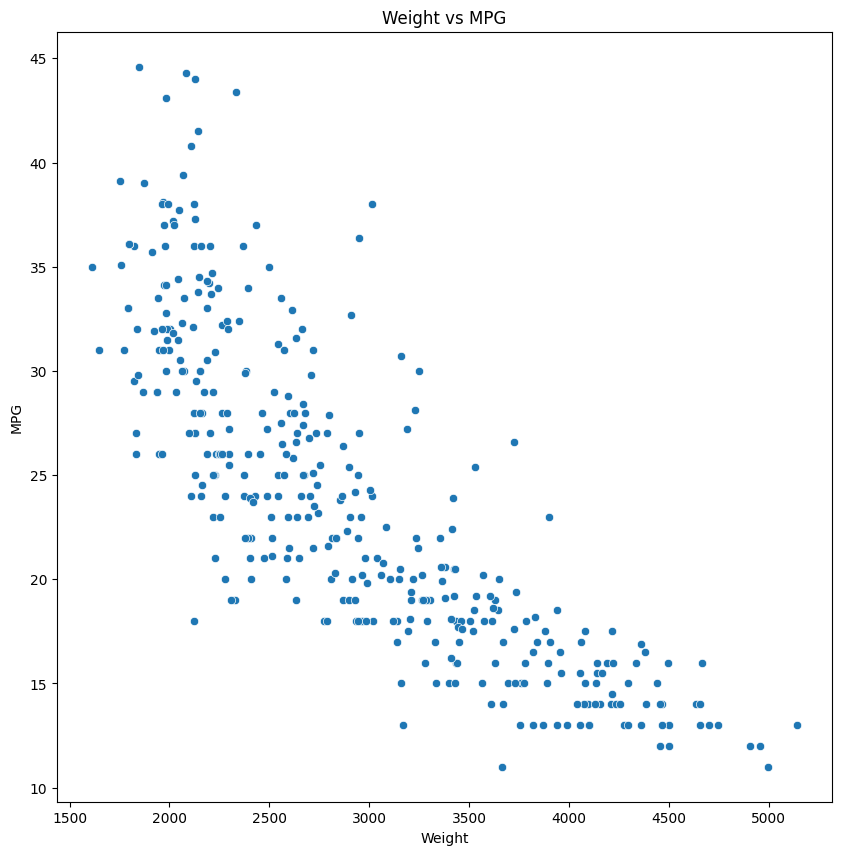

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='weight',y='mpg',data=df)
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

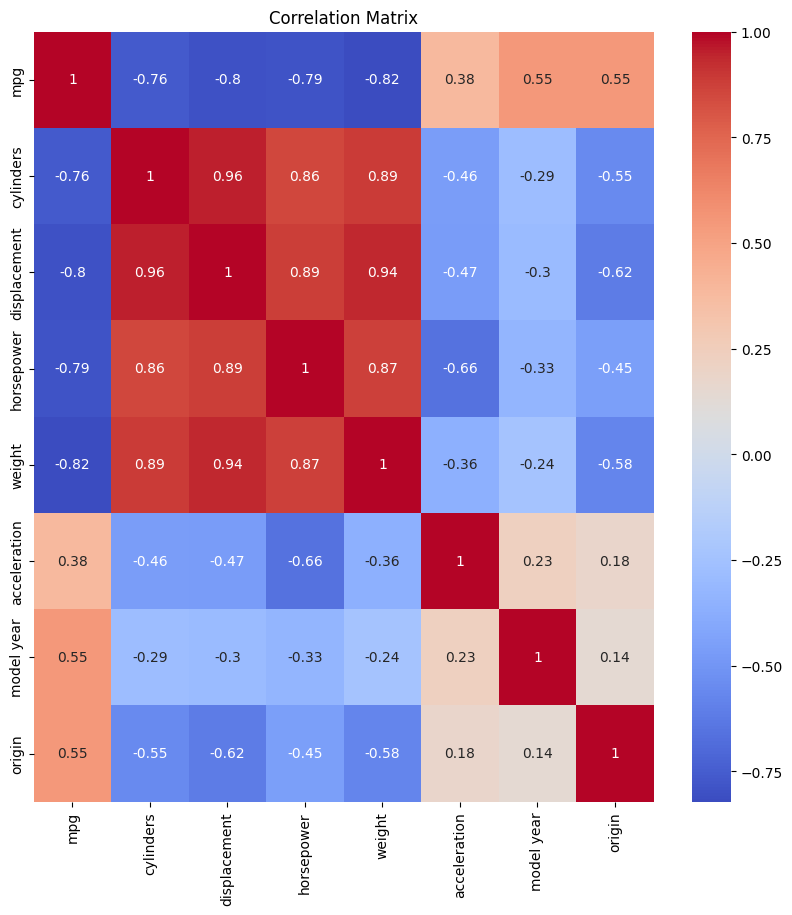

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
#Feature Selection
x = df.drop(columns=['mpg'])
y = df['mpg']

In [32]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [33]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [36]:
# Train-Test-Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape,x_test.shape

((299, 7), (75, 7))

In [40]:
#Linear Regression

Lr_model = LinearRegression()
Lr_model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred_Lr = Lr_model.predict(x_test)

In [42]:
print("Linear Regression Results:")
print("R2:",r2_score(y_test,y_pred_Lr))
print("MAE:",mean_absolute_error(y_test,y_pred_Lr))
print("MSE:",mean_squared_error(y_test,y_pred_Lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_Lr)))

Linear Regression Results:
R2: 0.8344421783261525
MAE: 2.457272831751926
MSE: 10.437899406932202
RMSE 3.2307738093113545


In [44]:
#Lasso Regression
Lasso_model = Lasso()
Lasso_model.fit(x_train,y_train)

Lasso()

In [45]:
y_pred_Lasso = Lasso_model.predict(x_test)

In [46]:
print("Lasso Regression Results:")
print("R2:",r2_score(y_test,y_pred_Lr))
print("MAE:",mean_absolute_error(y_test,y_pred_Lr))
print("MSE:",mean_squared_error(y_test,y_pred_Lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_Lr)))

Lasso Regression Results:
R2: 0.8344421783261525
MAE: 2.457272831751926
MSE: 10.437899406932202
RMSE 3.2307738093113545


In [51]:
#XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_pred_xgb = xgb_model.predict(x_test)

In [50]:
print("XGBoost Regression Results:")
print("R2:",r2_score(y_test,y_pred_xgb))
print("MAE:",mean_absolute_error(y_test,y_pred_xgb))
print("MSE:",mean_squared_error(y_test,y_pred_xgb))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

XGBoost Regression Results:
R2: 0.8568995103653143
MAE: 2.0451876856486004
MSE: 9.022035327525346
RMSE 3.003670309392385


In [52]:
# XGBoost is Best Model

In [53]:
# making a .pkl file
best_model = xgb_model
pickle.dump(best_model,open('mpg_prediction_model.pkl','wb'))
